In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df1 = pd.read_csv('Churn_Modelling.csv', encoding='latin-1')

In [3]:
df1.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df1.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df1.shape

(10000, 14)

In [6]:
df1.size

140000

In [7]:
df1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df1.isnull().values.any()

False

In [12]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df1.index

RangeIndex(start=0, stop=10000, step=1)

In [15]:
print(df1["Geography"].unique())
print(df1["NumOfProducts"].unique())
print(df1["HasCrCard"].unique())
print(df1["Exited"].unique())
print(df1["Gender"].unique())
print(df1["IsActiveMember"].unique())

['France' 'Spain' 'Germany']
[1 3 2 4]
[1 0]
[1 0]
['Female' 'Male']
[1 0]


In [16]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df1.iloc[0:4]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [18]:
df1.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [19]:
df1.loc[:, "CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

# DATA VISUALIZATION

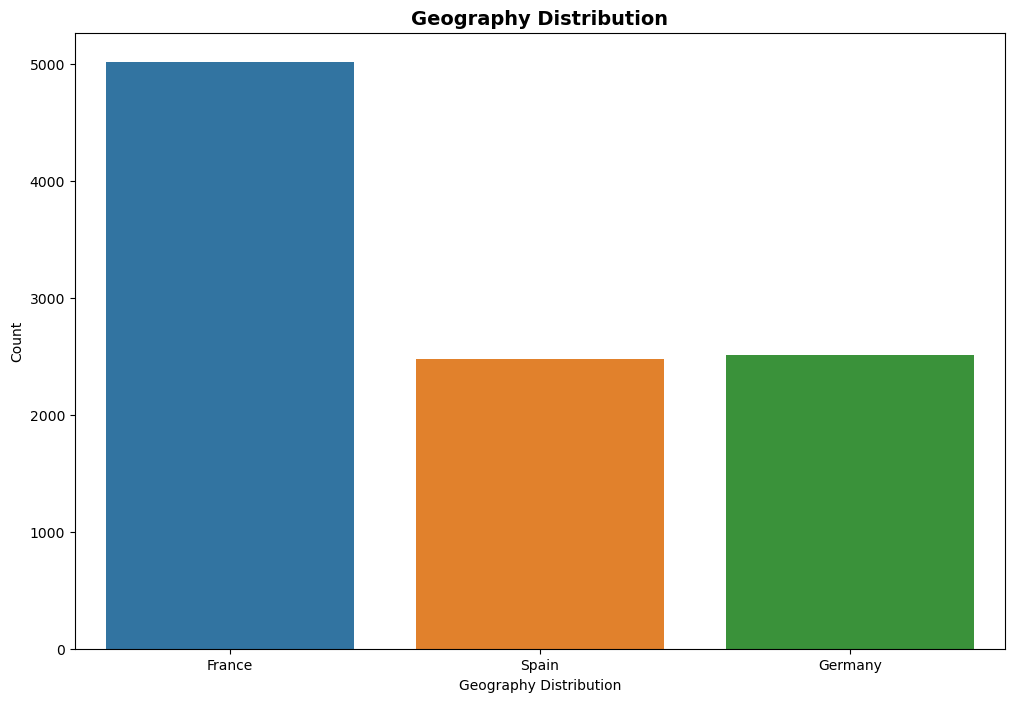

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x='Geography', data=df1)
plt.xlabel('Geography Distribution')
plt.ylabel('Count')
plt.title('Geography Distribution',fontsize=14, fontweight="bold", color="black")
plt.show()

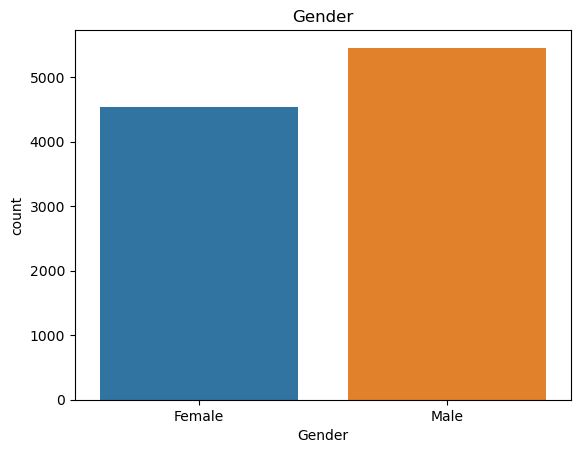

In [22]:
sns.countplot(x='Gender', data=df1)
plt.title('Gender')
plt.show()

C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


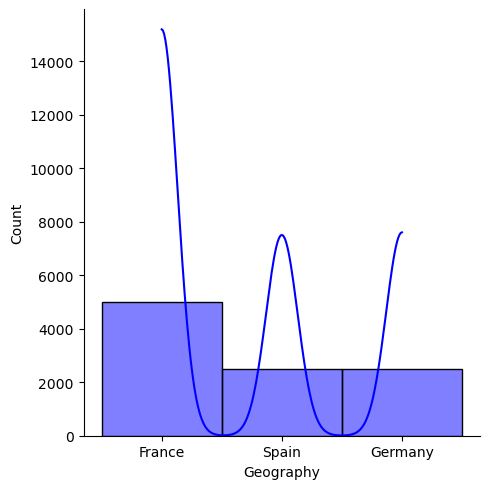

In [24]:
sns.displot(df1.Geography, kde=True, color="blue")

C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


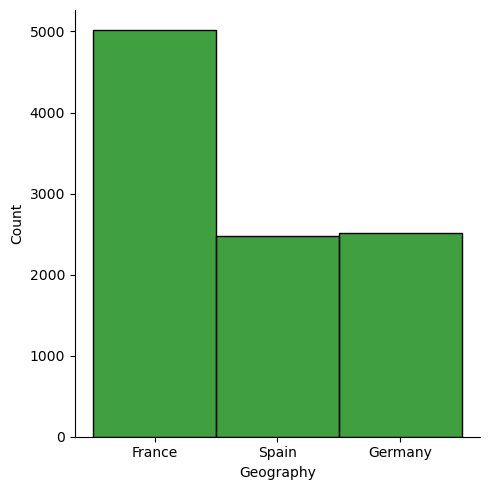

In [25]:
sns.displot(df1.Geography, color="green")

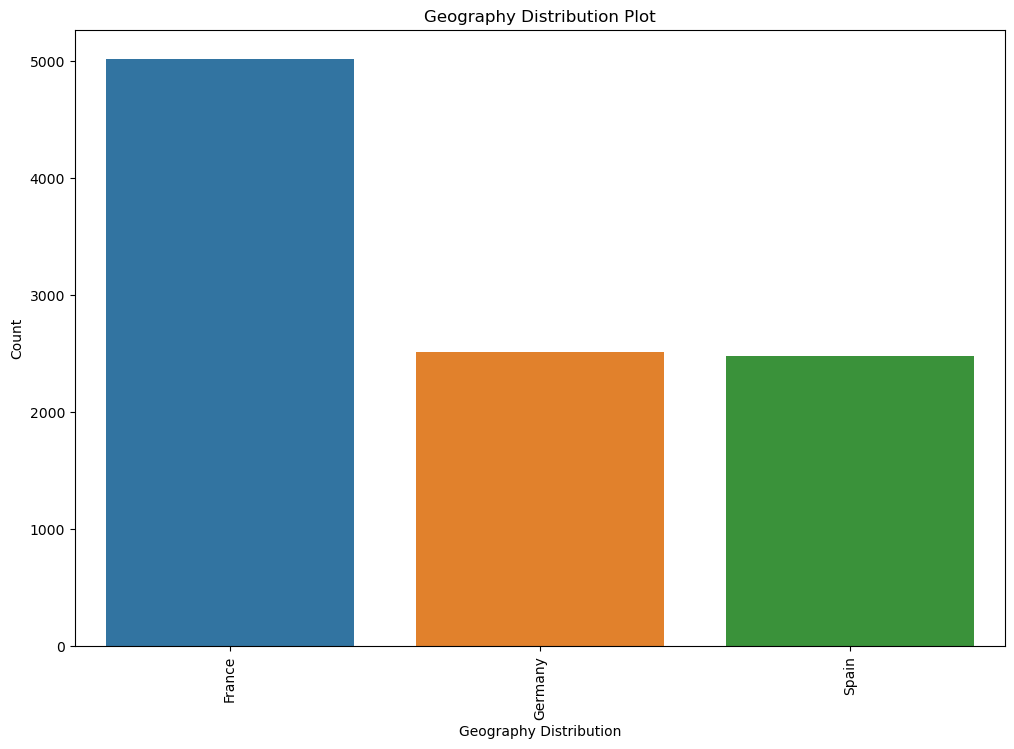

In [26]:
plt.figure(figsize=(12,8))
count1=df1.Geography.value_counts()
sns.barplot(x=count1.index, y=count1, orient='v')
plt.xlabel('Geography Distribution')
plt.ylabel('Count')
plt.title('Geography Distribution Plot')
plt.xticks(rotation=90)
plt.show()

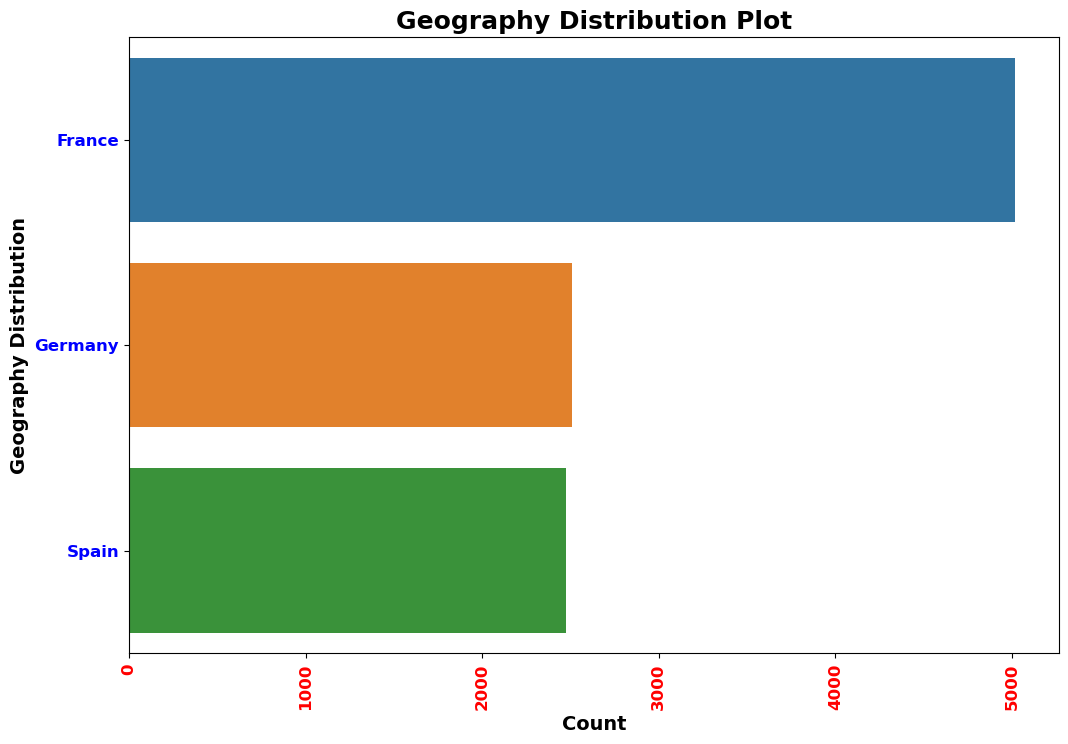

In [27]:
plt.figure(figsize=(12,8))
count1=df1.Geography.value_counts()
sns.barplot(x=count1, y=count1.index, orient='h')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Geography Distribution',fontsize=14, fontweight='bold')
plt.title('Geography Distribution Plot',fontsize=18, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='red')
plt.yticks(fontsize=12, fontweight='bold', color='blue')
plt.show()

# DATA PREPROCESSING

In [30]:
df1.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [31]:
df1.drop(labels=["RowNumber","Surname","Age"],axis=1, inplace=True)

In [33]:
df1 = pd.get_dummies(df1, drop_first=True)

In [34]:
df1.head(10)

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,2,125510.82,1,1,1,79084.10,0,False,True,False
5,15574012,645,8,113755.78,2,1,0,149756.71,1,False,True,True
6,15592531,822,7,0.00,2,1,1,10062.80,0,False,False,True
7,15656148,376,4,115046.74,4,1,0,119346.88,1,True,False,False
8,15792365,501,4,142051.07,2,0,1,74940.50,0,False,False,True
9,15592389,684,2,134603.88,1,1,1,71725.73,0,False,False,True


In [35]:
df1.tail(10)

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9990,15798964,714,3,35016.60,1,1,0,53667.08,0,True,False,True
9991,15769959,597,4,88381.21,1,1,0,69384.71,1,False,False,False
9992,15657105,726,2,0.00,1,1,0,195192.40,0,False,True,True
9993,15569266,644,7,155060.41,1,1,0,29179.52,0,False,False,True
9994,15719294,800,2,0.00,2,0,0,167773.55,0,False,False,False
9995,15606229,771,5,0.00,2,1,0,96270.64,0,False,False,True
9996,15569892,516,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,15584532,709,7,0.00,1,0,1,42085.58,1,False,False,False
9998,15682355,772,3,75075.31,2,1,0,92888.52,1,True,False,True
9999,15628319,792,4,130142.79,1,1,0,38190.78,0,False,False,False


In [36]:
# Splitting the training dataset
x = df1.drop("Exited", axis=1)
y = df1["Exited"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=40)

In [38]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

# LOGISTIC REGRESSION MODEL

In [39]:
log_reg_model = LogisticRegression()

In [40]:
log_reg_model.fit(x_train, y_train)

LogisticRegression()

In [41]:
log_reg_pred = log_reg_model.predict(x_test)

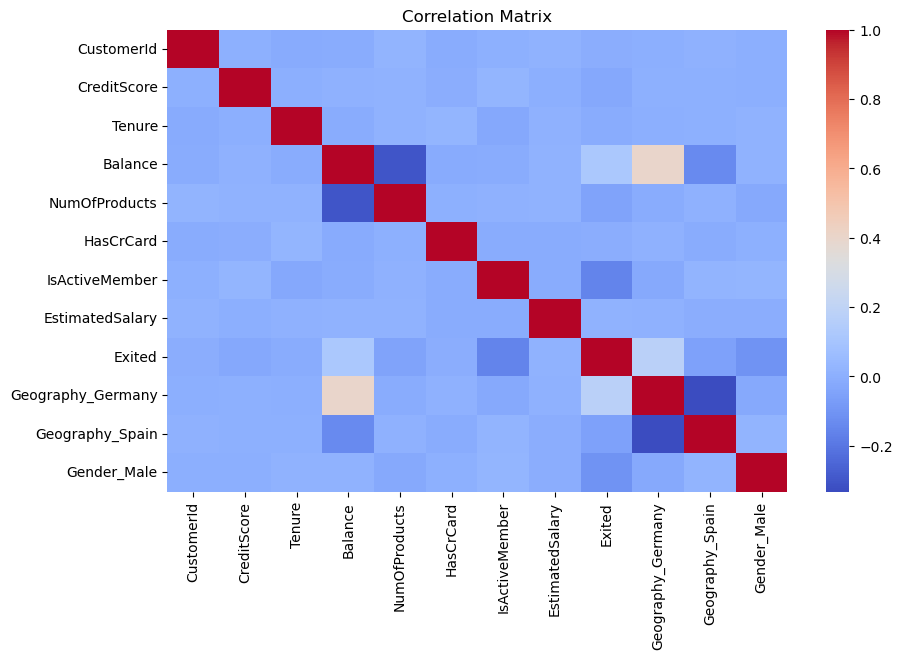

In [43]:
correlation_matrix=df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, r2_score

In [49]:
print("Logistic Regression Model")
print(confusion_matrix(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))
print("Accuracy - ", accuracy_score(y_test, log_reg_pred))
print("r2_Score - ", r2_score(y_test, log_reg_pred))
print("Precision_Score - ", precision_score(y_test, log_reg_pred))
print("Recall Score - ", recall_score(y_test, log_reg_pred))
print("f1_score - ", f1_score(y_test, log_reg_pred))

Logistic Regression Model
[[2371   19]
 [ 602    8]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      2390
           1       0.30      0.01      0.03       610

    accuracy                           0.79      3000
   macro avg       0.55      0.50      0.45      3000
weighted avg       0.70      0.79      0.71      3000

Accuracy -  0.793
r2_Score -  -0.2778654228685098
Precision_Score -  0.2962962962962963
Recall Score -  0.013114754098360656
f1_score -  0.025117739403453687


# RANDOM FOREST MODEL

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [54]:
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=40)

In [55]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=40)

In [56]:
rf_pred = rf_model.predict(x_test)

In [57]:
print("Random Forest Model")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Accuracy - ", accuracy_score(y_test, rf_pred))
print("r2_Score - ", r2_score(y_test, rf_pred))
print("Precision_Score - ", precision_score(y_test, rf_pred))
print("Recall Score - ", recall_score(y_test, rf_pred))
print("f1_score - ", f1_score(y_test, rf_pred))

Random Forest Model
[[2294   96]
 [ 428  182]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2390
           1       0.65      0.30      0.41       610

    accuracy                           0.83      3000
   macro avg       0.75      0.63      0.65      3000
weighted avg       0.80      0.83      0.80      3000

Accuracy -  0.8253333333333334
r2_Score -  -0.07826325536730949
Precision_Score -  0.6546762589928058
Recall Score -  0.2983606557377049
f1_score -  0.40990990990990994
